In [20]:
import cv2
from imshowtools import imshow, cvshow
from tqdm.auto import tqdm
import glob
import os

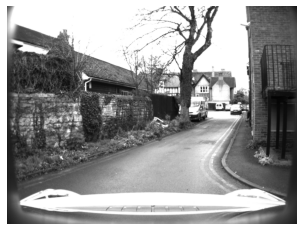

In [2]:
img_path = 'downloads/2014-12-12-10-45-15/stereo/centre/1418381152852941.png'
img_bayer = cv2.imread(img_path)

imshow(img_bayer)

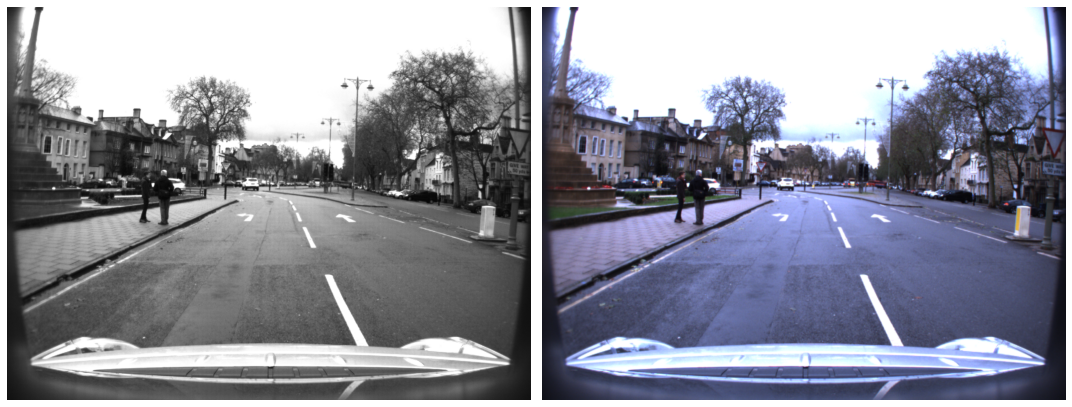

In [21]:
img_distorted = cv2.cvtColor(img_bayer[:, :, 0], cv2.COLOR_BAYER_GB2RGB)
cvshow(img_bayer, img_distorted, size=(15, 15))

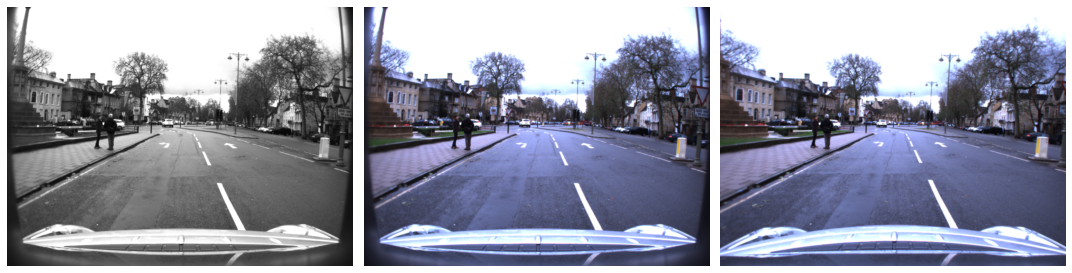

In [22]:
from camera_model import CameraModel

cm = CameraModel('camera_models', 'downloads/2014-12-12-10-45-15/stereo/centre')
img = cm.undistort(img_distorted)

cvshow(img_bayer, img_distorted, img, size=(15, 15))

In [72]:
routes = os.listdir('downloads')
route = routes[6]
route

'2015-02-03-19-43-11'

In [67]:
img_dir = os.path.join('downloads', route, 'stereo/centre')
img_paths = glob.glob(f'{img_dir}/*.png')

len(img_paths), img_paths[:5]

(6001,
 ['data/2015-02-03-19-43-11/stereo/centre/1422992945317345.png',
  'data/2015-02-03-19-43-11/stereo/centre/1422992754905555.png',
  'data/2015-02-03-19-43-11/stereo/centre/1422992818334487.png',
  'data/2015-02-03-19-43-11/stereo/centre/1422992970626432.png',
  'data/2015-02-03-19-43-11/stereo/centre/1422992931381726.png'])

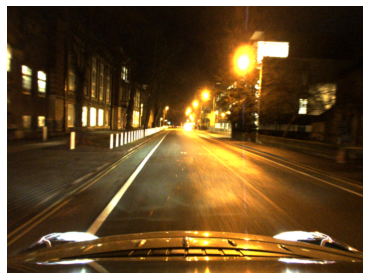

In [68]:
cm = CameraModel('camera_models', img_dir)

for img_path in img_paths[:1]:
    img_bayer = cv2.imread(img_path)
    img_distorted = cv2.cvtColor(img_bayer[:, :, 0], cv2.COLOR_BAYER_GB2RGB)
    img = cm.undistort(img_distorted)
    cvshow(img)

In [69]:
cm = CameraModel('camera_models', img_dir)
def debayer_undistort(img_path):
    try:
        # read, debayer and undistort
        img_bayer = cv2.imread(img_path)
        img_distorted = cv2.cvtColor(img_bayer[:, :, 0], cv2.COLOR_BAYER_GB2RGB)
        img = cm.undistort(img_distorted)

        # save jpg
        jpg_filename = f'{os.path.splitext(img_path)[0]}.jpg'
        cv2.imwrite(jpg_filename, img)

        # delete png
        os.remove(img_path)
    except Exception as e:
        print(f'Error processing {img_path}')

In [70]:
from multiprocessing import Pool

with Pool(processes=12) as p:
    list(tqdm(p.imap(debayer_undistort, img_paths), total=len(img_paths)))


  0%|          | 0/6001 [00:00<?, ?it/s]